### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data 


In [2]:
# df = pd.read_csv('M2_SENSORY_format.csv')
# here i use the filled blank value
df = pd.read_csv('SENSORY_mod.csv')
print(df)

    Sample Fiber_Type  Pressure  Concentrate  Replicate  Thick  Grainy  \
0        1     Potato        50            3          1    6.4     1.6   
1        2     Potato        50            3          2    6.4     1.7   
2        3     Potato        50            3          3    7.0     1.6   
3        4     Potato        90            3          1    7.3     1.5   
4        5     Potato        90            3          2    7.1     1.3   
5        6     Potato        90            3          3    7.1     1.1   
6        7     Tomato        50            2          1    4.9     0.0   
7        8     Tomato        50            2          2    4.8     0.0   
8        9     Tomato        50            2          3   50.0     0.0   
9       10     Tomato        50            3          1    5.1     0.3   
10      11     Tomato        50            3          2    4.4     0.2   
11      12     Tomato        50            3          3    5.4     0.2   
12      13     Tomato        90       

### Plotting data

['Potato' 'Tomato' 'Apple' 'Carrot']


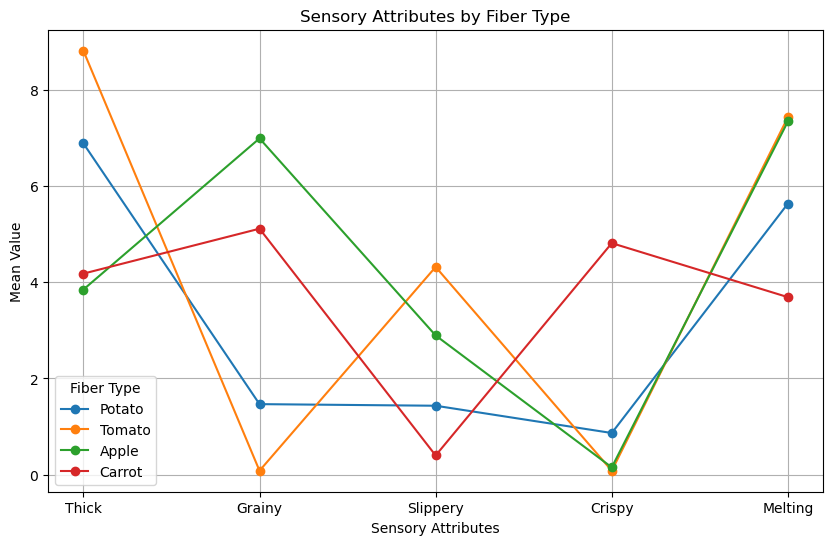

In [3]:
# Step 2: Ensure 'Fiber Type' is treated as categorical
# df['Fiber_Type'] = df['Fiber_Type'].astype('category')

# Step 3: Define the fiber types and variables to plot
fiber_types = df['Fiber_Type'].unique()  # Extract unique fiber types from the data
print(fiber_types)
sensory_variables = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]

# Step 4: Plot each fiber type's sensory data
plt.figure(figsize=(10, 6))  # Create a figure with a specific size

for fiber in fiber_types:
    # Filter the dataframe for each fiber type
    fiber_data = df[df['Fiber_Type'] == fiber]
    
    # Calculate the mean of each sensory variable
    mean_values = fiber_data[sensory_variables].mean()
    
    # Plot the sensory variables for the current fiber type
    plt.plot(sensory_variables, mean_values, marker='o', label=fiber)

# Step 5: Add labels, title, and legend
plt.xlabel('Sensory Attributes')
plt.ylabel('Mean Value')
plt.title('Sensory Attributes by Fiber Type')
plt.legend(title='Fiber Type')

# Step 6: Show the plot
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

### Plots for each fiber type

In [4]:
# df['Fiber_Type'] = df['Fiber_Type'].astype('category')
# print(df)
# Step 3: Define the sensory variables to plot
sensory_variables = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]

# Step 4: Loop through each fiber type and plot the data
fiber_types = df['Fiber_Type'].unique()  # Extract unique fiber types from the data
fiber_types

array(['Potato', 'Tomato', 'Apple', 'Carrot'], dtype=object)

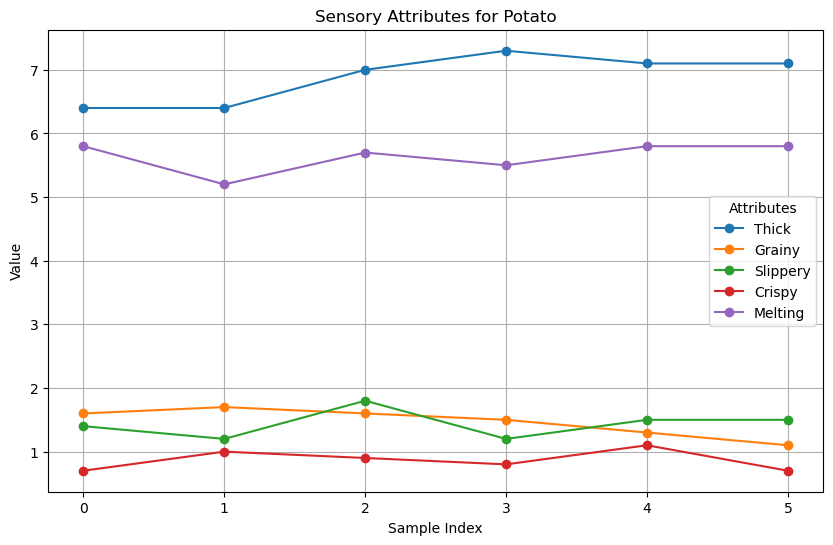

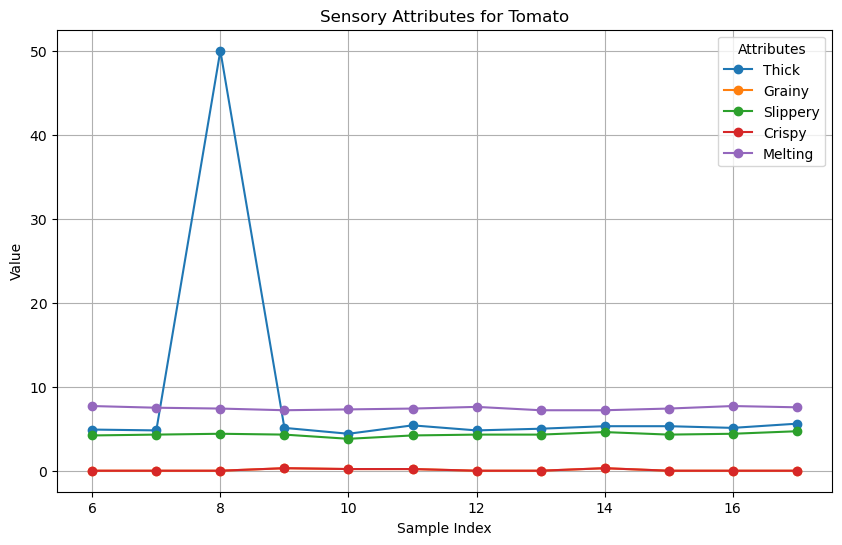

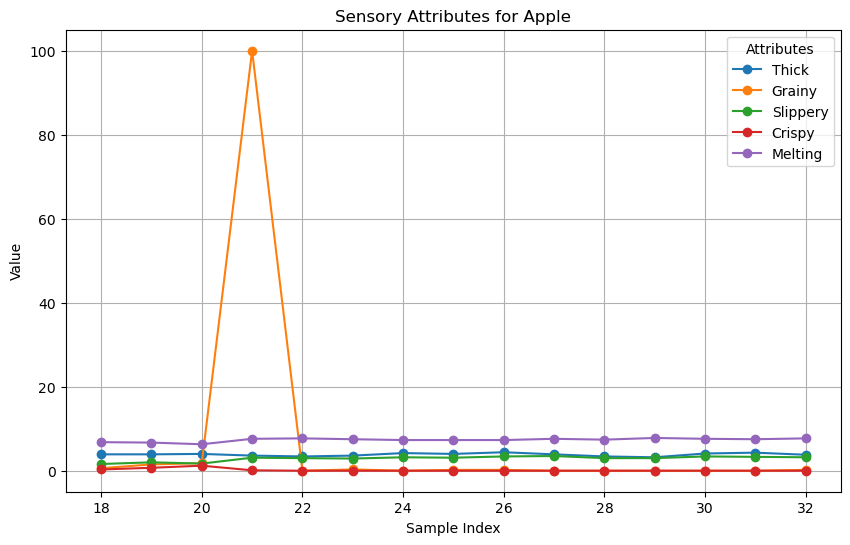

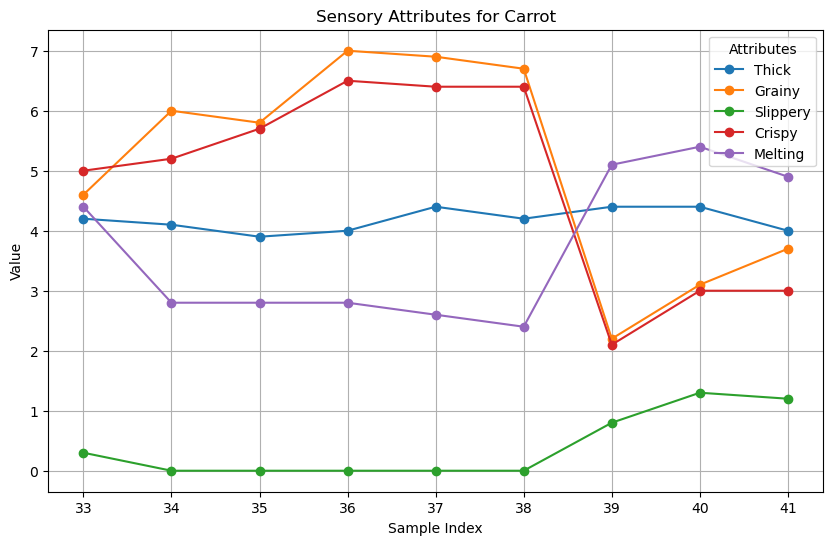

In [5]:

for fiber in fiber_types:
    fiber_data = df[df['Fiber_Type'] == fiber]
    
    plt.figure(figsize=(10, 6))
    for variable in sensory_variables:
        plt.plot(fiber_data.index, fiber_data[variable], marker='o', label=variable)
    
    plt.xlabel('Sample Index')  # or any other x-axis variable
    plt.ylabel('Value')
    plt.title(f'Sensory Attributes for {fiber}')
    plt.legend(title='Attributes')
    plt.grid(True)
    plt.show()

## Outlier stat


In [6]:
%pip install outlier-utils
from OUTLIERS import smirnov_grubbs as grubbs

In [7]:
sensory_variables = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]
for var in sensory_variables:
  data = df[var].tolist()
  result = grubbs.max_test_indices(data, alpha=0.05)
  print(f'the index of outlier in variable {var} is {result}')

the index of outlier in variable Thick is [8]
the index of outlier in variable Grainy is [21]
the index of outlier in variable Slippery is []
the index of outlier in variable Crispy is []
the index of outlier in variable Melting is []


the index of outlier in variable Thick is [8]\
the index of outlier in variable Grainy is [21]

### colorize outliers on a xy scatter plot of 2 intersting dependant variables

Text(0.5, 1.0, 'Thick vs Grainy')

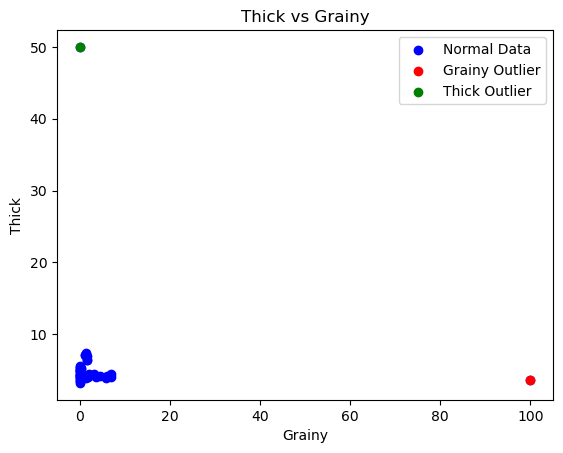

In [44]:
# variables Thick adn Grainy have outliers

plt.scatter(df['Grainy'], df['Thick'], color='blue', label='Normal Data')
plt.scatter(df['Grainy'][21], df['Thick'][21],color='red', label='Grainy Outlier')
plt.scatter(df['Grainy'][8], df['Thick'][8], color ='green', label='Thick Outlier')
plt.legend()
plt.xlabel('Grainy')
plt.ylabel('Thick')
plt.title('Thick vs Grainy')

## Kruskal-Wallis tests 
Is it significant (do an ANOVA/KKW using fiber as the categorical variable and thick as the dependent 
variable)

In [47]:
df['Fiber_Type']

0     Potato
1     Potato
2     Potato
3     Potato
4     Potato
5     Potato
6     Tomato
7     Tomato
8     Tomato
9     Tomato
10    Tomato
11    Tomato
12    Tomato
13    Tomato
14    Tomato
15    Tomato
16    Tomato
17    Tomato
18     Apple
19     Apple
20     Apple
21     Apple
22     Apple
23     Apple
24     Apple
25     Apple
26     Apple
27     Apple
28     Apple
29     Apple
30     Apple
31     Apple
32     Apple
33    Carrot
34    Carrot
35    Carrot
36    Carrot
37    Carrot
38    Carrot
39    Carrot
40    Carrot
41    Carrot
Name: Fiber_Type, dtype: object

[array([3.9, 3.9, 4. , 3.6, 3.4, 3.6, 4.2, 4. , 4.4, 3.9, 3.4, 3.2, 4.1,
       4.3, 3.8]), array([4.2, 4.1, 3.9, 4. , 4.4, 4.2, 4.4, 4.4, 4. ]), array([6.4, 6.4, 7. , 7.3, 7.1, 7.1]), array([ 4.9,  4.8, 50. ,  5.1,  4.4,  5.4,  4.8,  5. ,  5.3,  5.3,  5.1,
        5.6])]
KruskalResult(statistic=33.24780788600466, pvalue=2.855420925226847e-07)


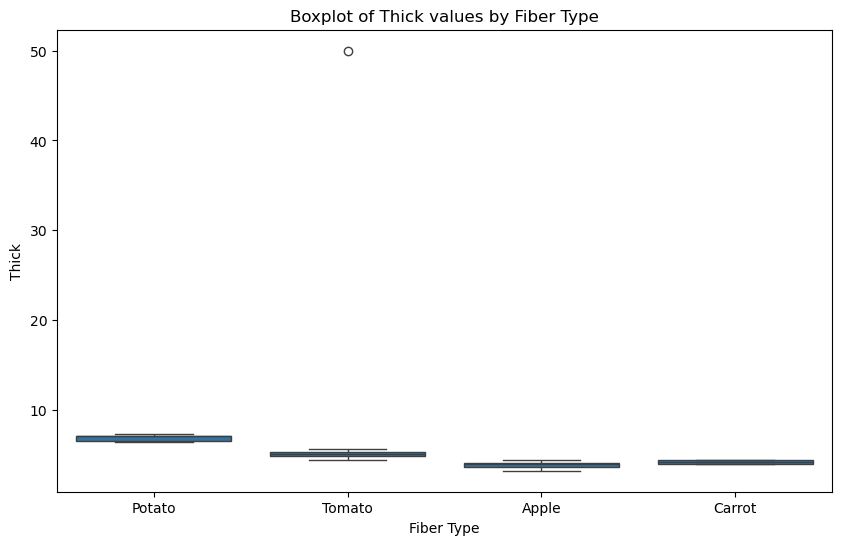

In [57]:
grouped_data = [group['Thick'].values for name, group in df.groupby('Fiber_Type')]
print(grouped_data)

# Perform Kruskal-Wallis test
kruskal_test = stats.kruskal(*grouped_data)  
print(kruskal_test)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fiber_Type', y='Thick', data=df)
plt.title('Boxplot of Thick values by Fiber Type')
plt.xlabel('Fiber Type')
plt.ylabel('Thick')
plt.show()

### cluster plot

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, ward

    Sample  Pressure  Concentrate  Replicate  Thick  Grainy  Slippery  Crispy  \
0        1        50            3          1    6.4     1.6       1.4     0.7   
1        2        50            3          2    6.4     1.7       1.2     1.0   
2        3        50            3          3    7.0     1.6       1.8     0.9   
3        4        90            3          1    7.3     1.5       1.2     0.8   
4        5        90            3          2    7.1     1.3       1.5     1.1   
5        6        90            3          3    7.1     1.1       1.5     0.7   
6        7        50            2          1    4.9     0.0       4.2     0.0   
7        8        50            2          2    4.8     0.0       4.3     0.0   
8        9        50            2          3   50.0     0.0       4.4     0.0   
9       10        50            3          1    5.1     0.3       4.3     0.3   
10      11        50            3          2    4.4     0.2       3.8     0.2   
11      12        50        

Text(0, 0.5, 'Sample')

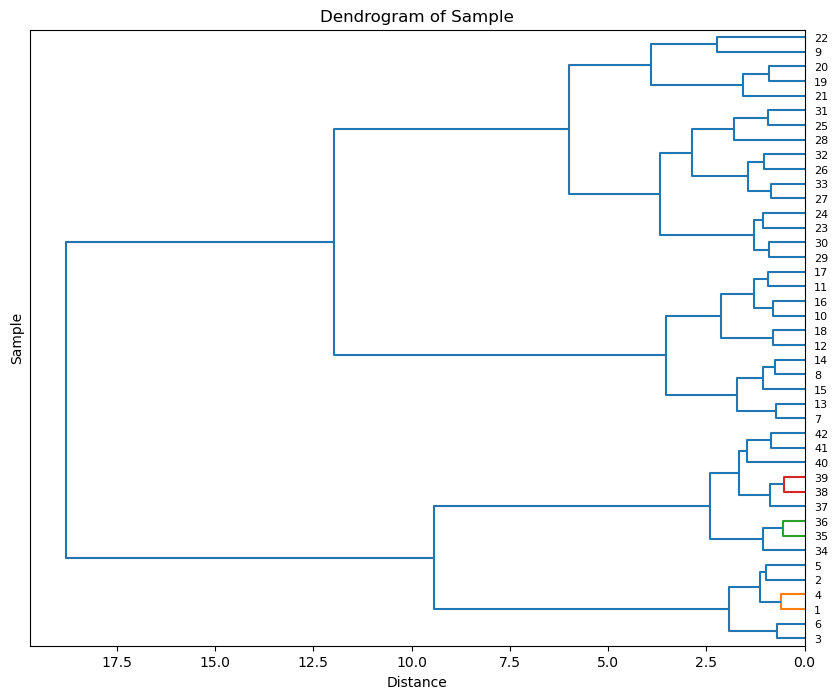

In [11]:
# Convert non-numeric column 'Fiber_Type' using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Fiber_Type'])
print(df_encoded)

# Prepare data for clustering by selecting only numeric columns
df_numeric = df_encoded.drop(columns=['Sample'])  # Drop 'Sample' 

# Standardize/Normalize data (optional)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Compute cosine similarity
similarity_matrix = cosine_similarity(df_scaled)

# Convert similarity to distance matrix
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering
linkage_matrix = ward(distance_matrix)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size as needed
dendrogram(linkage_matrix, color_threshold=0.7, labels=df['Sample'].astype(str).values, orientation="left", ax=ax)
plt.title('Dendrogram of Sample')
plt.xlabel('Distance')
plt.ylabel('Sample')


Leaves represent individual samples.\
Branches indicate how clusters are combined and their similarity.\
Height shows the distance at which clusters are merged.\
Cutting Height determines the number of clusters.\


## Normality 

In [12]:
import statsmodels.api as sm
from scipy.stats import shapiro 

Thick: statistic = 0.25217540652124426, p_value =0.000000
Grainy: statistic = 0.22982997014010254, p_value =0.000000
Slippery: statistic = 0.908907849524654, p_value =0.002689
Crispy: statistic = 0.6406666069095319, p_value =0.000000
Melting: statistic = 0.7797408947081214, p_value =0.000002


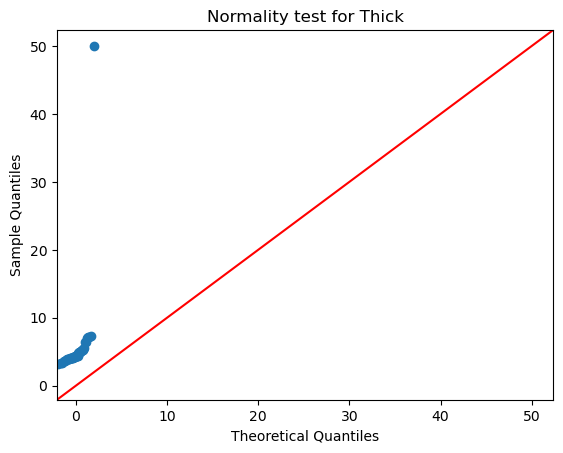

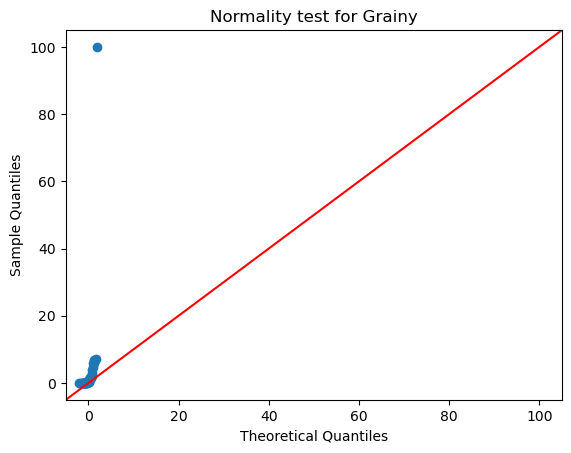

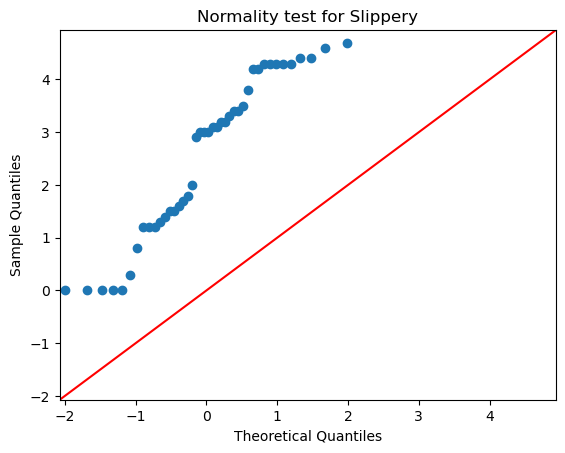

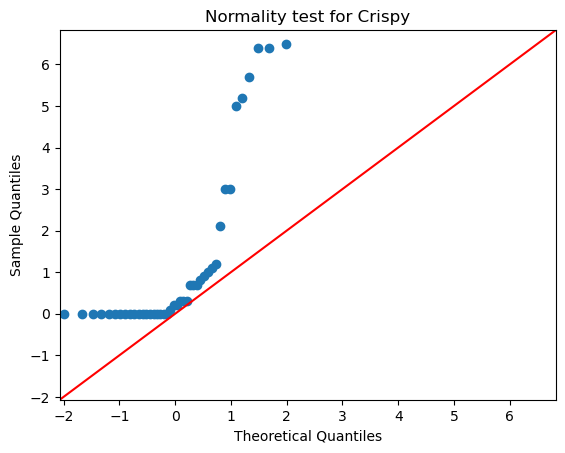

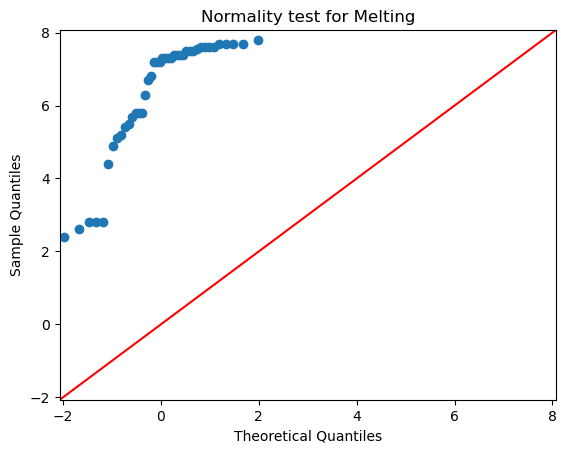

In [13]:
dependent_vars = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]
for var in dependent_vars:
  #create Q-Q plot with 45-degree line added to plot
  fig = sm.qqplot(df[var], line='45')
  plt.title(f'Normality test for {var}')
  stat, p_value = shapiro(df[var])
  print(f'{var}: statistic = {stat}, p_value ={p_value:.6f}')
  



All of the five variables' p_values are less then 0.05, reject the hypothesis of the Shapiro-wilk test. None of them is normally distributed.

### corrplot

In [14]:
%pip install biokit
from biokit.viz import corrplot
from scipy.stats import spearmanr

Note: you may need to restart the kernel to use updated packages.


In [15]:
from itertools import combinations

Thick vs Grainy: the correlation coefficient is -0.07488122156542264, the p value is 0.637424
Thick vs Slippery: the correlation coefficient is 0.24584961018909884, the p value is 0.116555
Thick vs Crispy: the correlation coefficient is 0.08352781578618534, the p value is 0.598953
Thick vs Melting: the correlation coefficient is -0.191706684398535, the p value is 0.223899
Grainy vs Slippery: the correlation coefficient is -0.8066195978170148, the p value is 0.000000
Grainy vs Crispy: the correlation coefficient is 0.9153352939744036, the p value is 0.000000
Grainy vs Melting: the correlation coefficient is -0.8089320563832832, the p value is 0.000000
Slippery vs Crispy: the correlation coefficient is -0.807927679113695, the p value is 0.000000
Slippery vs Melting: the correlation coefficient is 0.7642031605974744, the p value is 0.000000
Crispy vs Melting: the correlation coefficient is -0.906972318601621, the p value is 0.000000


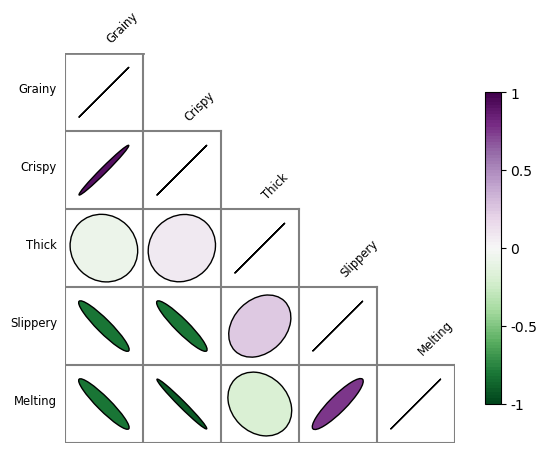

In [16]:
## non-normaly ditribution => use spearmanr ciorrelation
dependent_vars = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]
df_vars=df[dependent_vars]
corr = df_vars.corr(method='spearman')
cp = corrplot.Corrplot(corr)
cp.plot(method='ellipse',cmap='PRGn_r', rotation=45, lower='ellipse')

for var1, var2 in combinations(dependent_vars,2):
  col1 = df_vars[var1]
  col2 = df_vars[var2]
  r_value, p_value = spearmanr(col1, col2)
  print(f'{var1} vs {var2}: the correlation coefficient is {r_value}, the p value is {p_value:.6f}')






Seems like Thick and Grainy, Thick and Crispy are the most correlated. 
Try to further investigate with linear regression


### linear regression 

# Basic MVA

Mean-centering and standarization


In [17]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale # data scaling
import seaborn as sns 

## using same stractegy as iris dataset

In [18]:

import plotly.express as px

In [19]:
# extract data, target_name, feature_name
new_df = df[['Fiber_Type', 'Thick', 'Grainy', 'Slippery', 'Crispy', 'Melting']]
print(new_df)
new_df_numeric = df[['Thick', 'Grainy', 'Slippery', 'Crispy', 'Melting']]
# assign data 
new_df_data = new_df_numeric.to_numpy()
target = new_df['Fiber_Type']
print(f'target:{target}')
target_name = target.unique()
print(target_name)
feature_name = ['Thick', 'Grainy', 'Slippery', 'Crispy', 'Melting']
print(feature_name)


   Fiber_Type  Thick  Grainy  Slippery  Crispy  Melting
0      Potato    6.4     1.6       1.4     0.7     5.80
1      Potato    6.4     1.7       1.2     1.0     5.20
2      Potato    7.0     1.6       1.8     0.9     5.70
3      Potato    7.3     1.5       1.2     0.8     5.50
4      Potato    7.1     1.3       1.5     1.1     5.80
5      Potato    7.1     1.1       1.5     0.7     5.80
6      Tomato    4.9     0.0       4.2     0.0     7.70
7      Tomato    4.8     0.0       4.3     0.0     7.50
8      Tomato   50.0     0.0       4.4     0.0     7.40
9      Tomato    5.1     0.3       4.3     0.3     7.20
10     Tomato    4.4     0.2       3.8     0.2     7.30
11     Tomato    5.4     0.2       4.2     0.2     7.40
12     Tomato    4.8     0.0       4.3     0.0     7.60
13     Tomato    5.0     0.0       4.3     0.0     7.20
14     Tomato    5.3     0.3       4.6     0.3     7.20
15     Tomato    5.3     0.0       4.3     0.0     7.40
16     Tomato    5.1     0.0       4.4     0.0  

In [20]:
# assign Input(X) and Output(Y) variables
X = new_df_data
Y = target
# check the data dimension
print(X.shape)
print(Y.shape)

(42, 5)
(42,)


In [21]:
# data scaling
X = scale(X)

In [22]:
# perform PCA analysis
# define the number of PC to use as 2
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [23]:
# explained variance for each PC
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.56173138, 0.20933637, 0.18587622])

In [24]:
explained_variance = np.insert(explained_variance, 0, 0)

In [25]:
# preparing the cumulative variance data
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [26]:
pc_df = pd.DataFrame(['','PC1', 'PC2','PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [27]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance


,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.561731,0.562
2,PC2,0.209336,0.771
3,PC3,0.185876,0.957


In [28]:
# Scree Plot

fig = px.bar(df_explained_variance, x='PC', y='Explained Variance', text='Explained Variance', width=800)
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [29]:
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.561731,0.562
2,PC2,0.209336,0.771
3,PC3,0.185876,0.957


In [30]:
# Explained Variance + Cumulative Variance
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=df_explained_variance['PC'],
    y=df_explained_variance['Cumulative Variance'],
    marker=dict(size=8, color='LightSeaGreen'),
    name='Cumulative Variance'
  )
)

fig.add_trace(
  go.Bar(
    x=df_explained_variance['PC'],
    y=df_explained_variance['Explained Variance'],
    marker=dict(color='RoyalBlue'),
    name='Explained Variance'
  )
)
fig.update_layout(
  title='Explained Variance and Cumluative Variance'
)

fig.show()

In [31]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=8, color="LightSeaGreen"),
        name="Cumulative Variance"
    ), row=1, col=1)

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()

In [32]:
# Compute scores values
scores = pca.transform(X)
# converte scores(array) to scores_df(dataframe) to be more visualized
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,-0.454340,-0.191489,-0.027739
1,-0.828709,-0.241899,0.005363
2,-0.387878,-0.259648,0.047930
3,-0.647940,-0.304381,0.078146
4,-0.516062,-0.284527,0.047638
5,-0.403369,-0.279869,0.027091
6,1.438857,0.036395,-0.335774
7,1.401991,0.031093,-0.339492
8,2.209967,-4.082071,4.563196
9,1.214322,-0.014098,-0.274942


In [33]:
print(target_name)

['Potato' 'Tomato' 'Apple' 'Carrot']


In [34]:
# create an empty array object for Y_label
Y_label = []

for i in Y:
  if i == 'Potato':
    Y_label.append('Potato')
  elif i == 'Tomato':
    Y_label.append('Tomato')
  elif i == 'Apple':
    Y_label.append('Apple')
  else:
    Y_label.append('Carrot')

# create a df for fiber
Fibers = pd.DataFrame(Y_label, columns=['Fibers'])
print(Fibers)
# combine two df scores and Fiber together
df_scores = pd.concat([scores_df, Fibers], axis=1)
df_scores
    

    Fibers
0   Potato
1   Potato
2   Potato
3   Potato
4   Potato
5   Potato
6   Tomato
7   Tomato
8   Tomato
9   Tomato
10  Tomato
11  Tomato
12  Tomato
13  Tomato
14  Tomato
15  Tomato
16  Tomato
17  Tomato
18   Apple
19   Apple
20   Apple
21   Apple
22   Apple
23   Apple
24   Apple
25   Apple
26   Apple
27   Apple
28   Apple
29   Apple
30   Apple
31   Apple
32   Apple
33  Carrot
34  Carrot
35  Carrot
36  Carrot
37  Carrot
38  Carrot
39  Carrot
40  Carrot
41  Carrot


,PC1,PC2,PC3,Fibers
0,-0.454340,-0.191489,-0.027739,Potato
1,-0.828709,-0.241899,0.005363,Potato
2,-0.387878,-0.259648,0.047930,Potato
3,-0.647940,-0.304381,0.078146,Potato
4,-0.516062,-0.284527,0.047638,Potato
5,-0.403369,-0.279869,0.027091,Potato
6,1.438857,0.036395,-0.335774,Tomato
7,1.401991,0.031093,-0.339492,Tomato
8,2.209967,-4.082071,4.563196,Tomato
9,1.214322,-0.014098,-0.274942,Tomato


In [35]:
explained_variance_df.iloc[1][0]

C:\Users\Yao_L\AppData\Local\Temp\ipykernel_33232\1078686708.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.5617313783922107

In [36]:
# 2D scatter
fig=px.scatter(df_scores, x='PC1', y='PC2',color='Fibers', symbol='Fibers', opacity=0.5)
fig.update_layout(
    title={
                    'text': 'PC Score',
                    'x': 0.5,
                    'xanchor':'center',
                    'y': 0.95,
                    'yanchor':'top'},
    xaxis_title= 'PC1:56.2%',
    yaxis_title='PC2:20.9%'
)
fig.show()

In [37]:
# 3D scatter plot
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
                    color='Fibers',
                    symbol='Fibers',
                    opacity=0.5
)
#tight layout
fig.update_layout(
                  title={
                    'text': 'PC Score',
                    'x': 0.5,
                    'xanchor':'center',
                    'y': 0.95,
                    'yanchor':'top'},
  margin=dict(l=0, r=0, b=0, t=0),
  scene=dict(
  xaxis_title= 'PC1:56.2%',
  yaxis_title='PC2:20.9%',
  zaxis_title='PC3:18.6%')
)
fig.show()

In [38]:
# Retrieve the loading values:
# we will have 5 loadings one for each feature
loadings = pca.components_.T
# create a loading df 
df_loadings = pd.DataFrame(loadings, columns=['PC1','PC2','PC3'], index=feature_name)

df_loadings


,PC1,PC2,PC3
Thick,0.124783,-0.634878,0.757471
Grainy,-0.046148,0.759742,0.647624
Slippery,0.560876,0.003803,0.004657
Crispy,-0.570597,-0.074705,0.061134
Melting,0.584924,0.118858,-0.055329


In [39]:
# 2D loadings plot
loadings_label=df_loadings.index 
fig = px.scatter(df_loadings, x='PC1', y='PC2', text=loadings_label)
fig.update_traces(marker=dict(color='red', size=6))
fig.show()

In [40]:
# 3D loading plot
loadings_label = df_loadings.index
fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3', text=loadings_label)
fig.update_traces(marker=dict(color='red'))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [58]:
# 2D bi-plot
fig = px.scatter(df_scores, x='PC1', y='PC2',
                    color='Fibers',
                    symbol='Fibers',
                    opacity=0.5)

fig.add_trace(go.Scatter(
    x=df_loadings['PC1'],
    y=df_loadings['PC2'],
    mode='markers+text',
    marker=dict(size=9,color='red'),
    text=loadings_label,
    textposition='top center',
    name='loadings'
)
)

fig.update_layout(
                  title={
                    'text': 'Bi-plot with scores and loadings',
                    'x': 0.5,
                    'xanchor':'center',
                    'y': 0.95,
                    'yanchor':'top'},
                  margin=dict(l=0, r=0, b=0, t=0),

                  
                xaxis_title='PC1:56.2%',
                 yaxis_title='PC2:20.9%'
                        ) # Adjust legend position if needed
fig.show()

In [42]:
# 3D bi-plot
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
                    color='Fibers',
                    symbol='Fibers',
                    opacity=0.5)

fig.add_trace(go.Scatter3d(
    x=df_loadings['PC1'],
    y=df_loadings['PC2'],
    z=df_loadings['PC3'],
    mode='markers+text',
    marker=dict(size=6,color='red'),
    text=loadings_label,
    textposition='top center',
    name='loadings'
)
)

fig.update_layout(
                  title={
                    'text': 'Bi-plot with scores and loadings',
                    'x': 0.5,
                    'xanchor':'center',
                    'y': 0.95,
                    'yanchor':'top'},
                  margin=dict(l=0, r=0, b=0, t=50),
                  scene=dict(
                      xaxis_title='PC1:56.2%',
                      yaxis_title='PC2:20.9%',
                      zaxis_title='PC3:18.6%'),
                  legend=dict(x=0.9, y=0.9))  
# fig.update_traces(marker=dict(size=3))
fig.show()